In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib

matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.size'] = 18

In [2]:
def coord(file):
    snr = pd.read_csv(file, sep='\t',comment='#')
    ra = []
    dec = []
    dist = snr["Distance"]
    for p in snr["Position"]:
        c = SkyCoord(p, unit=(u.hourangle, u.deg))
        ra.append(c.ra.degree)
        dec.append(c.dec.degree)

    ra = np.array(ra)* np.pi/180
    dec = np.array(dec) * np.pi/180
    x = np.cos(ra) * np.cos(dec) * dist
    y = np.sin(ra) * np.cos(dec) * dist
    z = np.sin(dec) * dist
    
    return x, y, z

In [3]:
x_snr, y_snr, z_snr = coord("../data/neutrino/snr.tsv")
x_lmc, y_lmc, z_lmc = coord("../data/neutrino/snr_lmc.tsv")
x_smc, y_smc, z_smc = coord("../data/neutrino/snr_smc.tsv")

## 2D Plots

Text(0, 0.5, 'y (kpc)')

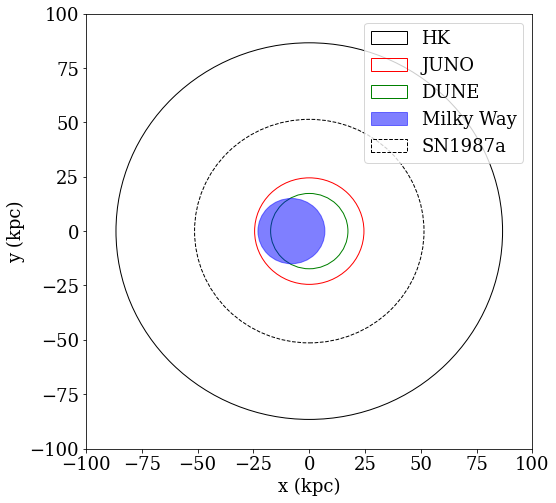

In [4]:
# SN detection with at least 1000 events
# Best detectors (future)

events = [75000,6000,3000]
labels = ["HK","JUNO","DUNE"]
colors = ["k","r","g"]

num = 1000

fig, ax = plt.subplots()
fig.set_size_inches((8,8))
circles = []
for i in range(len(events)):
    circles.append(plt.Circle((0, 0), 10 * (events[i]/num)**0.5, fill = False, color = colors[i]))
    ax.add_artist(circles[i])


mw = plt.Circle((-8, 0), 15, color = "b", alpha = 0.5)
ax.add_artist(mw)

sn = plt.Circle((0, 0), 51.4, fill = False, color = "k", linestyle = "--")
ax.add_artist(sn)

circles = circles + [mw, sn]
labels = labels + ["Milky Way", "SN1987a"]
ax.legend(circles, labels)


plt.xlim(-100,100)
plt.ylim(-100,100)
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")

Text(0, 0.5, 'y (kpc)')

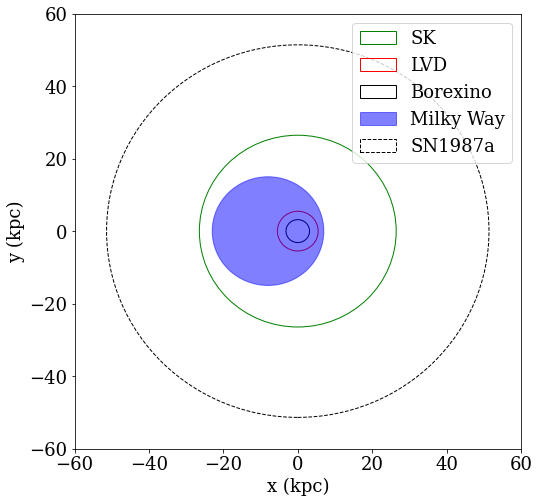

In [5]:
# SN detection with at least 1000 events
# Best detectors (current)

events = [7000,300,100]
labels = ["SK","LVD","Borexino"]
colors = ["g","r","k"]

num = 1000

fig, ax = plt.subplots()
fig.set_size_inches((8,8))
circles = []
for i in range(len(events)):
    circles.append(plt.Circle((0, 0), 10 * (events[i]/num)**0.5, fill = False, color = colors[i]))
    ax.add_artist(circles[i])

mw = plt.Circle((-8, 0), 15, color = "b", alpha = 0.5)
ax.add_artist(mw)

sn = plt.Circle((0, 0), 51.4, fill = False, color = "k", linestyle = "--")
ax.add_artist(sn)

circles = circles + [mw, sn]
labels = labels + ["Milky Way", "SN1987a"]
ax.legend(circles, labels)


plt.xlim(-60,60)
plt.ylim(-60,60)
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")

## 3D Plots

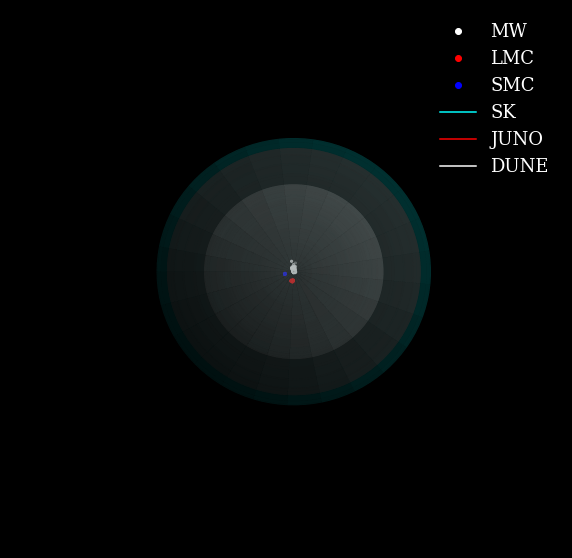

In [6]:
plt.style.use('dark_background')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_snr, y_snr, z_snr, s=5, color="w")
ax.scatter(x_lmc, y_lmc, z_lmc, s=5, color="r")
ax.scatter(x_smc, y_smc, z_smc, s=5, color="b")
# ax.set_xlim3d(-70, 70)
# ax.set_ylim3d(-70, 70)
# ax.set_zlim3d(-70, 70)

label = ["MW", "LMC", "SMC"]
lines = [matplotlib.lines.Line2D([0],[0], linestyle="none", c='w', marker = 'o'), 
            matplotlib.lines.Line2D([0],[0], linestyle="none", c='r', marker = 'o'),
            matplotlib.lines.Line2D([0],[0], linestyle="none", c='b', marker = 'o')]


events = [7000, 6000,3000]
labels = ["SK","JUNO","DUNE"]
colors = ["cyan","r","w"]
num = 10
for i in range(len(events)):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = 10 * (events[i]/num)**0.5 * np.outer(np.cos(u), np.sin(v))
    y = 10 * (events[i]/num)**0.5 * np.outer(np.sin(u), np.sin(v))
    z = 10 * (events[i]/num)**0.5 * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z,  rstride=4, cstride=4, color=colors[i], alpha=0.1)
    line = matplotlib.lines.Line2D([0],[0], linestyle="-", c=colors[i])
    label.append(labels[i])
    lines.append(line)

ax.grid(False)
plt.axis('off')
ax.legend(lines, label, numpoints = 1,frameon=False)
ax.view_init(90, 90)

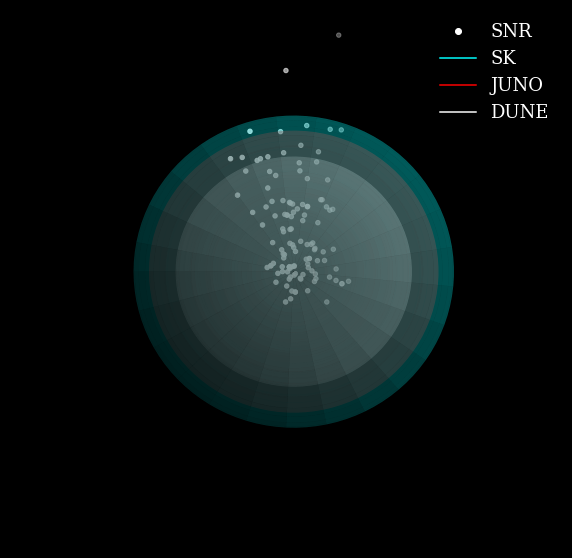

In [7]:
# Seadrow + Burrows Paper
# 10 Msun, NH

plt.style.use('dark_background')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_snr, y_snr, z_snr, s=20, color="w")
ax.set_xlim3d(-10, 10)
ax.set_ylim3d(-10, 10)
ax.set_zlim3d(-10, 10)

label = ["SNR"]
lines = [matplotlib.lines.Line2D([0],[0], linestyle="none", c='w', marker = 'o')]

radius = [10.61,9.59,7.83]
labels = ["SK","JUNO","DUNE"]
colors = ["cyan","r","w"]
for i in range(len(events)):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = radius[i] * np.outer(np.cos(u), np.sin(v))
    y = radius[i] * np.outer(np.sin(u), np.sin(v))
    z = radius[i] * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z,  rstride=4, cstride=4, color=colors[i], alpha=0.2)
    line = matplotlib.lines.Line2D([0],[0], linestyle="-", c=colors[i])
    label.append(labels[i])
    lines.append(line)

ax.grid(False)
plt.axis('off')
ax.legend(lines, label, numpoints = 1,frameon=False)
ax.view_init(90, 90)